In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

%matplotlib inline

## Importing the Sample Image

In [150]:
image= cv2.imread('Albert.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

misc

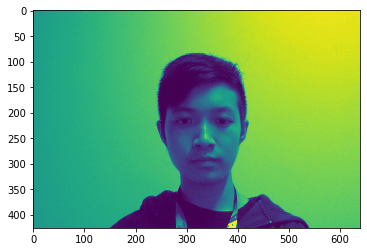

In [151]:
plt.imshow(gray)

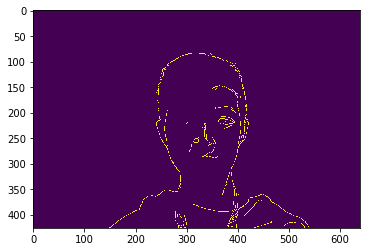

In [153]:
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

## Edges
We try to convert all of our photos for the training set into edges; this helps with the privacy as the majority of their face is hidden and it removes the background and any noise that could distract our model.

In [77]:
path = 'C:\\Users\\RQ\\Downloads\\Photos'

for i in range(1,6):
    class_num = '\\Class ' + str(i)
    for j in range(1,36):
        file = '\\a' + str(j) + '.jpg'
        temp = path + class_num + file
        print(temp)
        image = cv2.imread(temp)

        new_path = path + '\\edge' + class_num
        edges = cv2.Canny(image,100,200)
        final_path = new_path + file
        print(final_path)
        cv2.imwrite(final_path,edges)

C:\Users\RQ\Downloads\Photos\Class 1\a1.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a1.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a2.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a2.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a3.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a3.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a4.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a4.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a5.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a5.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a6.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a6.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a7.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a7.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a8.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a8.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a9.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a9.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a10.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 1\a10.jpg
C:\Users\RQ\Downloads\Photos\Class 1\a11.jpg
C:\Users\RQ\Downloads\P

C:\Users\RQ\Downloads\Photos\Class 3\a18.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a18.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a19.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a19.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a20.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a20.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a21.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a21.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a22.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a22.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a23.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a23.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a24.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a24.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a25.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a25.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a26.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a26.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a27.jpg
C:\Users\RQ\Downloads\Photos\edge\Class 3\a27.jpg
C:\Users\RQ\Downloads\Photos\Class 3\a28.jpg
C:\Us

## Facial Recognition
Another method to solve the privacy issue would be have our model run facial recognition and then blur our the photos so that we can only focus on the posture. This may help our model as well so that it is only focusing on the body posture and does not associate certain faces with a specific class

### Load the Classifiers

In [154]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Calculate coordinates based on the gray photo
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
result_image = image.copy()

Faces detected!


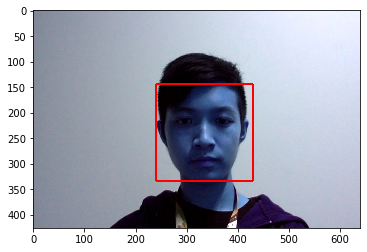

In [155]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

#plot the image
plt.imshow(image)
#write image 
cv2.imwrite('face_detection.jpg',img)

print('Faces detected!')

In [156]:
if len(faces) != 0:         # If there are faces in the images
    for f in faces:         # For each face in the image

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = [ v for v in f ]

        # get the rectangle img around all the faces
        cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 5)
        sub_face = image[y:y+h, x:x+w]
        # apply a gaussian blur on this new recangle image
        sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
        # merge this blurry rectangle to our final image
        result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
        face_file_name = "./face_" + str(y) + ".jpg"
        cv2.imwrite(face_file_name, sub_face)

# cv2.imshow("Detected face", result_image)
cv2.imwrite("./result.png", result_image)


True

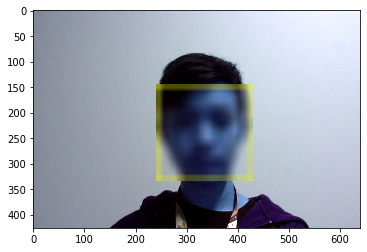

In [157]:
plt.imshow(result_image)

In [158]:
path

'C:\\Users\\RQ\\Downloads\\Photos'

In [183]:
def facial_recog(clas):
    temp = path + '\\' + clas
    for i in range(1,36):
        file = 'a' + str(i) + '.jpg'
        image = cv2.imread(path + '\\' + clas + '\\' + file)
        
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        result_image = image.copy()
        
        for (x,y,w,h) in faces:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = image[y:y+h, x:x+w]
            print('Face in' + file + 'detected!')
            
        if len(faces) != 0: # If there are faces
            for f in faces: # For each face in the image 
                x, y, w, h = [ v for v in f ]  # Get the origin co-ordinates and the length and width till where the face extends
                # get the rectangle img around all the faces
                cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 5)
                sub_face = image[y:y+h, x:x+w]
                # apply a gaussian blur on this new recangle image
                sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
                # merge this blurry rectangle to our final image
                result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face 
                face_file_name = "./face_" + str(y) + ".jpg" 
                cv2.imwrite(face_file_name, sub_face)
                
        cv2.imwrite(path + '\\Blur\\' + clas +'\\' + file, result_image)



In [186]:
facial_recog('Class 3')
facial_recog('Class 4')
facial_recog('Class 5')

a1.jpg C:\Users\RQ\Downloads\Photos\Class 3a1.jpg <class 'numpy.ndarray'>
Face ina1.jpgdetected!
a2.jpg C:\Users\RQ\Downloads\Photos\Class 3a2.jpg <class 'numpy.ndarray'>
Face ina2.jpgdetected!
a3.jpg C:\Users\RQ\Downloads\Photos\Class 3a3.jpg <class 'numpy.ndarray'>
Face ina3.jpgdetected!
a4.jpg C:\Users\RQ\Downloads\Photos\Class 3a4.jpg <class 'numpy.ndarray'>
Face ina4.jpgdetected!
a5.jpg C:\Users\RQ\Downloads\Photos\Class 3a5.jpg <class 'numpy.ndarray'>
Face ina5.jpgdetected!
a6.jpg C:\Users\RQ\Downloads\Photos\Class 3a6.jpg <class 'numpy.ndarray'>
Face ina6.jpgdetected!
a7.jpg C:\Users\RQ\Downloads\Photos\Class 3a7.jpg <class 'numpy.ndarray'>
Face ina7.jpgdetected!
a8.jpg C:\Users\RQ\Downloads\Photos\Class 3a8.jpg <class 'numpy.ndarray'>
Face ina8.jpgdetected!
a9.jpg C:\Users\RQ\Downloads\Photos\Class 3a9.jpg <class 'numpy.ndarray'>
Face ina9.jpgdetected!
a10.jpg C:\Users\RQ\Downloads\Photos\Class 3a10.jpg <class 'numpy.ndarray'>
Face ina10.jpgdetected!
a11.jpg C:\Users\RQ\Downloa

a13.jpg C:\Users\RQ\Downloads\Photos\Class 5a13.jpg <class 'numpy.ndarray'>
Face ina13.jpgdetected!
Face ina13.jpgdetected!
a14.jpg C:\Users\RQ\Downloads\Photos\Class 5a14.jpg <class 'numpy.ndarray'>
Face ina14.jpgdetected!
a15.jpg C:\Users\RQ\Downloads\Photos\Class 5a15.jpg <class 'numpy.ndarray'>
Face ina15.jpgdetected!
a16.jpg C:\Users\RQ\Downloads\Photos\Class 5a16.jpg <class 'numpy.ndarray'>
Face ina16.jpgdetected!
a17.jpg C:\Users\RQ\Downloads\Photos\Class 5a17.jpg <class 'numpy.ndarray'>
Face ina17.jpgdetected!
Face ina17.jpgdetected!
a18.jpg C:\Users\RQ\Downloads\Photos\Class 5a18.jpg <class 'numpy.ndarray'>
Face ina18.jpgdetected!
a19.jpg C:\Users\RQ\Downloads\Photos\Class 5a19.jpg <class 'numpy.ndarray'>
Face ina19.jpgdetected!
a20.jpg C:\Users\RQ\Downloads\Photos\Class 5a20.jpg <class 'numpy.ndarray'>
Face ina20.jpgdetected!
Face ina20.jpgdetected!
Face ina20.jpgdetected!
a21.jpg C:\Users\RQ\Downloads\Photos\Class 5a21.jpg <class 'numpy.ndarray'>
Face ina21.jpgdetected!
Face